In [1]:
# Import necessary libraries
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Add project directory to path
import os
import sys
sys.path.append(os.path.abspath(".."))

In [3]:
# Import custom modules
from src.data.data_ingestion import DataIngestion
from src.data.data_preprocessing import DataPreprocessing
from src.analysis.correlation_analysis import CorrelationAnalysis, CorrelationAnalysisConfig
from src.utils.logger import get_logger


In [4]:
# Initialize logger
logger = get_logger("pairs_selection_notebook")
logger.info("Starting pairs selection analysis")

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 8)


[ 2025-05-11 19:49:24,408 ] 3 pairs_selection_notebook - INFO - Starting pairs selection analysis


In [9]:
# Create a custom config with the correct path
from src.data.data_ingestion import DataIngestionConfig


custom_config = DataIngestionConfig()
# Fix the path - go up one level from notebooks directory
custom_config.project_root = os.path.dirname(os.getcwd())  
custom_config.raw_data_path = os.path.join(custom_config.project_root, 'data', 'raw', 'Portfolio_prices.csv')
custom_config.processed_data_dir = os.path.join(custom_config.project_root, 'data', 'processed')

# Use the existing DataIngestion class with our fixed config
data_ingestion = DataIngestion(config=custom_config)
raw_df = data_ingestion.read_data()

print(f"Dataset shape: {raw_df.shape}")
raw_df.head()

[ 2025-05-11 19:51:12,072 ] 47 src.data.data_ingestion - INFO - Raw data path: d:\projects\Relative-Value-Analysis-Pairs-Trading\data\raw\Portfolio_prices.csv
[ 2025-05-11 19:51:12,072 ] 48 src.data.data_ingestion - INFO - File exists: True
[ 2025-05-11 19:51:12,074 ] 61 src.data.data_ingestion - INFO - Started reading data from d:\projects\Relative-Value-Analysis-Pairs-Trading\data\raw\Portfolio_prices.csv
[ 2025-05-11 19:51:12,120 ] 76 src.data.data_ingestion - INFO - Successfully read data with shape: (35397, 9)


Dataset shape: (35397, 9)


,Date,Ticker,Open,High,Low,Close,Adjusted,Returns,Volume
0,2020-01-03,JPM,137.500000,139.229996,137.080002,138.339996,119.874138,-0.013197,10386800
1,2020-01-03,KO,54.320000,54.990002,54.090000,54.689999,46.494698,-0.005455,11354500
2,2020-01-03,LMT,404.019989,417.170013,403.000000,413.739990,359.312317,0.035981,2990100
3,2020-01-03,MS,51.220001,51.450001,50.830002,51.200001,43.273079,-0.016142,6706000
4,2020-01-03,MSCI,262.200012,263.579987,259.269989,260.750000,248.019470,-0.019921,459700


In [10]:
# Preprocess the data
processed_df = data_preprocessor.preprocess_data(raw_df)
logger.info(f"Processed data shape: {processed_df.shape}")

[ 2025-05-11 19:51:18,768 ] 185 src.data.data_preprocessing - INFO - Starting data preprocessing
[ 2025-05-11 19:51:18,769 ] 82 src.data.data_preprocessing - INFO - Converting Date to datetime format
[ 2025-05-11 19:51:18,780 ] 87 src.data.data_preprocessing - INFO - Successfully converted Date to datetime format
[ 2025-05-11 19:51:18,782 ] 108 src.data.data_preprocessing - INFO - Handling missing values
[ 2025-05-11 19:51:18,785 ] 112 src.data.data_preprocessing - INFO - Missing values before handling: Date        0
Ticker      0
Open        0
High        0
Low         0
Close       0
Adjusted    0
Returns     0
Volume      0
dtype: int64
d:\projects\Relative-Value-Analysis-Pairs-Trading\src\data\data_preprocessing.py:116: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[numeric_cols] = df[numeric_cols].fillna(method='ffill')
[ 2025-05-11 19:51:18,795 ] 120 src.data.data_preprocessing - INFO - 

In [11]:
# Display the first few rows of the processed data
print("Sample of processed data:")
display(processed_df.head())

Sample of processed data:


,Date,Ticker,Open,High,Low,Close,Adjusted,Returns,Volume
0,2020-01-03,JPM,137.500000,139.229996,137.080002,138.339996,119.874138,-0.013197,10386800
1,2020-01-03,KO,54.320000,54.990002,54.090000,54.689999,46.494698,-0.005455,11354500
2,2020-01-03,LMT,404.019989,417.170013,403.000000,413.739990,359.312317,0.035981,2990100
3,2020-01-03,MS,51.220001,51.450001,50.830002,51.200001,43.273079,-0.016142,6706000
4,2020-01-03,MSCI,262.200012,263.579987,259.269989,260.750000,248.019470,-0.019921,459700


In [12]:
# 2. Analyze the tickers in the portfolio
tickers = processed_df['Ticker'].unique()
logger.info(f"Number of tickers in portfolio: {len(tickers)}")
print(f"Tickers in portfolio: {sorted(tickers)}")


[ 2025-05-11 19:51:57,163 ] 3 pairs_selection_notebook - INFO - Number of tickers in portfolio: 27


Tickers in portfolio: ['AAPL', 'ADAP', 'AGCO', 'BA', 'BG', 'CALM', 'CAT', 'CSCO', 'CVX', 'DDOG', 'DE', 'GRWG', 'HUM', 'IBKR', 'IEX', 'JPM', 'KO', 'LMT', 'MS', 'MSCI', 'MSFT', 'NFLX', 'OSK', 'PFE', 'PG', 'SPY', 'TMUS']


In [13]:
# 3. Calculate correlation matrix
logger.info("Calculating correlation matrix")


[ 2025-05-11 19:52:03,354 ] 2 pairs_selection_notebook - INFO - Calculating correlation matrix


In [14]:
# Initialize correlation analysis with custom configuration
corr_config = CorrelationAnalysisConfig(
    min_correlation_threshold=0.7,
    correlation_method='pearson',
    output_dir=os.path.join('..', 'data', 'processed')
)
correlation_analyzer = CorrelationAnalysis(config=corr_config)


In [15]:

# Calculate correlation matrix using adjusted prices
correlation_matrix = correlation_analyzer.calculate_correlation_matrix(
    processed_df,
    price_column='Adjusted',
    group_column='Ticker',
    date_column='Date'
)

[ 2025-05-11 19:52:13,104 ] 68 src.analysis.correlation_analysis - INFO - Calculating correlation matrix using Adjusted column
[ 2025-05-11 19:52:13,105 ] 72 src.analysis.correlation_analysis - INFO - Using pearson correlation method
[ 2025-05-11 19:52:13,119 ] 80 src.analysis.correlation_analysis - INFO - Successfully calculated correlation matrix with shape: (27, 27)


In [16]:
# Display the correlation matrix
print("Correlation matrix (sample):")
display(correlation_matrix.iloc[:5, :5])


Correlation matrix (sample):


Ticker,AAPL,ADAP,AGCO,BA,BG
Ticker,,,,,
AAPL,1.000000,-0.667942,0.511887,-0.190768,0.709505
ADAP,-0.667942,1.000000,-0.495229,0.132032,-0.735430
AGCO,0.511887,-0.495229,1.000000,0.216269,0.811926
BA,-0.190768,0.132032,0.216269,1.000000,-0.050174
BG,0.709505,-0.735430,0.811926,-0.050174,1.000000


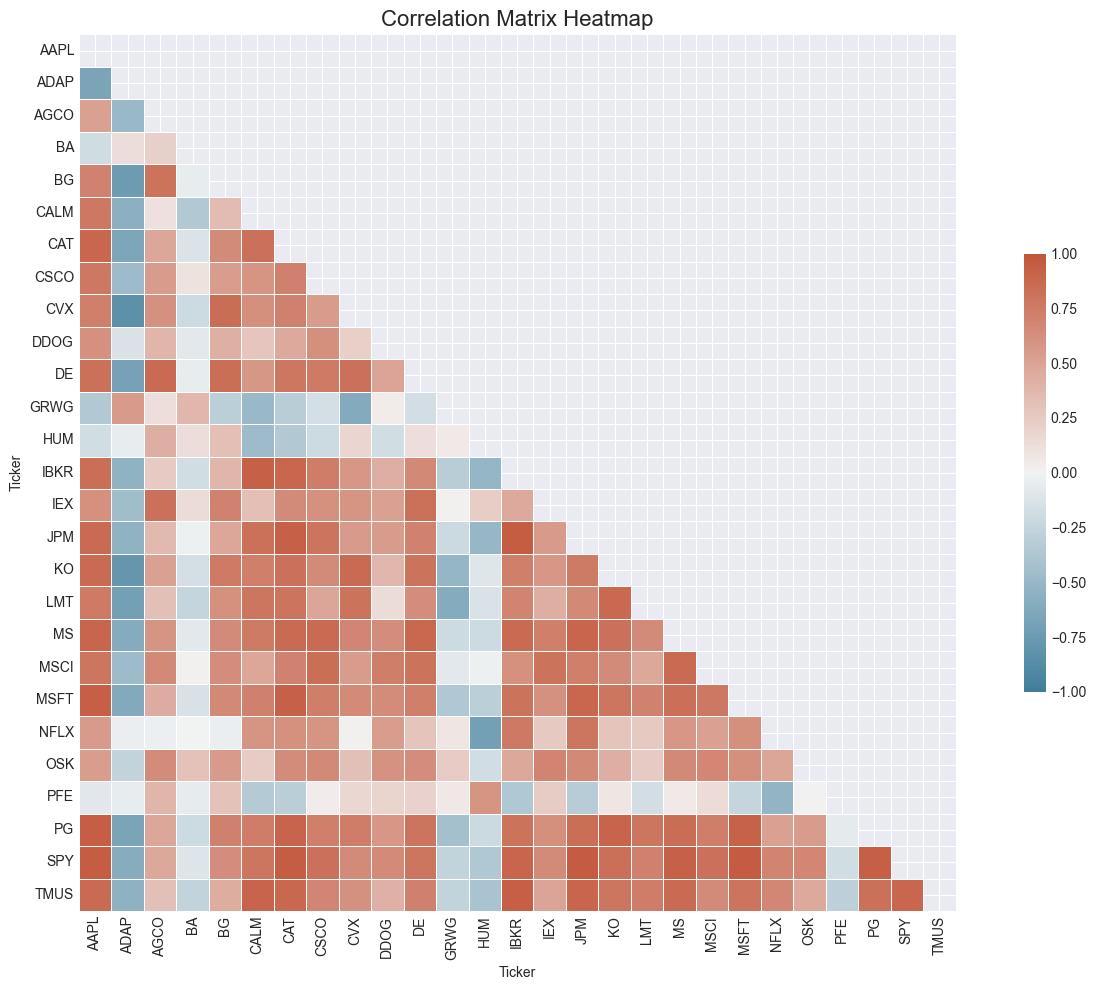

In [17]:
# 4. Visualize the correlation matrix
plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=False)

plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

In [18]:
# 5. Identify highly correlated pairs
logger.info("Identifying highly correlated pairs")
correlated_pairs = correlation_analyzer.identify_highly_correlated_pairs(
    correlation_matrix,
    threshold=corr_config.min_correlation_threshold
)

[ 2025-05-11 19:52:31,137 ] 2 pairs_selection_notebook - INFO - Identifying highly correlated pairs
[ 2025-05-11 19:52:31,140 ] 150 src.analysis.correlation_analysis - INFO - Indentifying ticker pairs with correlation above 0.7
[ 2025-05-11 19:52:31,149 ] 166 src.analysis.correlation_analysis - INFO - Identified 111 ticker pairs with correlation above 0.7


In [19]:
# Create a DataFrame for better visualization
if correlated_pairs:
    pairs_df = pd.DataFrame(correlated_pairs, columns=['Ticker1', 'Ticker2', 'Correlation'])
    pairs_df = pairs_df.sort_values('Correlation', ascending=False).reset_index(drop=True)
    
    print(f"Found {len(pairs_df)} highly correlated pairs with correlation > {corr_config.min_correlation_threshold}")
    display(pairs_df.head(20))
else:
    print(f"No pairs found with correlation above {corr_config.min_correlation_threshold}")
    print("Consider lowering the correlation threshold.")


Found 111 highly correlated pairs with correlation > 0.7


,Ticker1,Ticker2,Correlation
0,MSFT,SPY,0.959111
1,JPM,SPY,0.958038
2,AAPL,SPY,0.949968
3,IBKR,JPM,0.947095
4,CAT,SPY,0.946959
5,AAPL,PG,0.941011
6,AAPL,MSFT,0.933114
7,IBKR,TMUS,0.932941
8,PG,SPY,0.930726
9,MS,SPY,0.928539


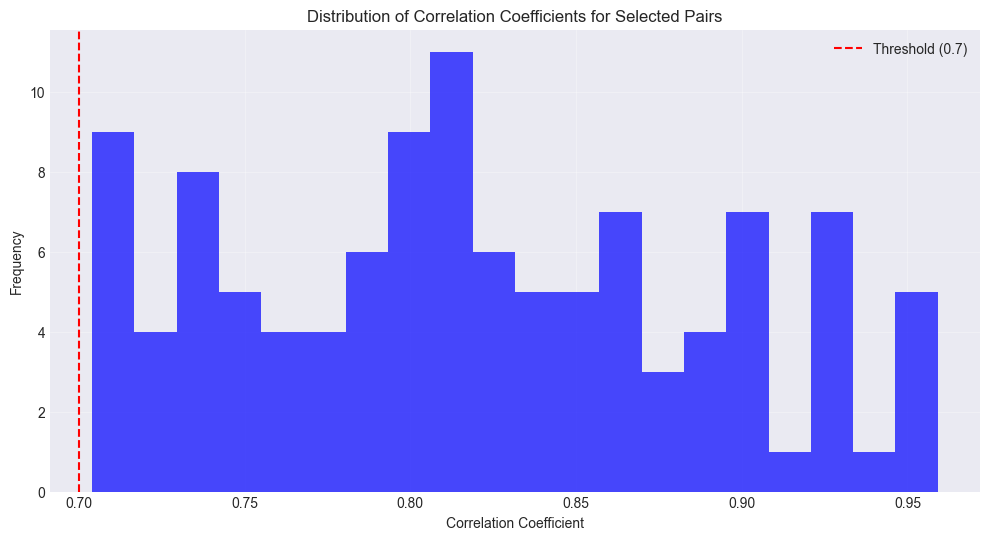

In [20]:
# 6. Analyze the distribution of correlations
plt.figure(figsize=(12, 6))
plt.hist(pairs_df['Correlation'], bins=20, alpha=0.7, color='blue')
plt.axvline(x=corr_config.min_correlation_threshold, color='red', linestyle='--', 
            label=f'Threshold ({corr_config.min_correlation_threshold})')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Frequency')
plt.title('Distribution of Correlation Coefficients for Selected Pairs')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

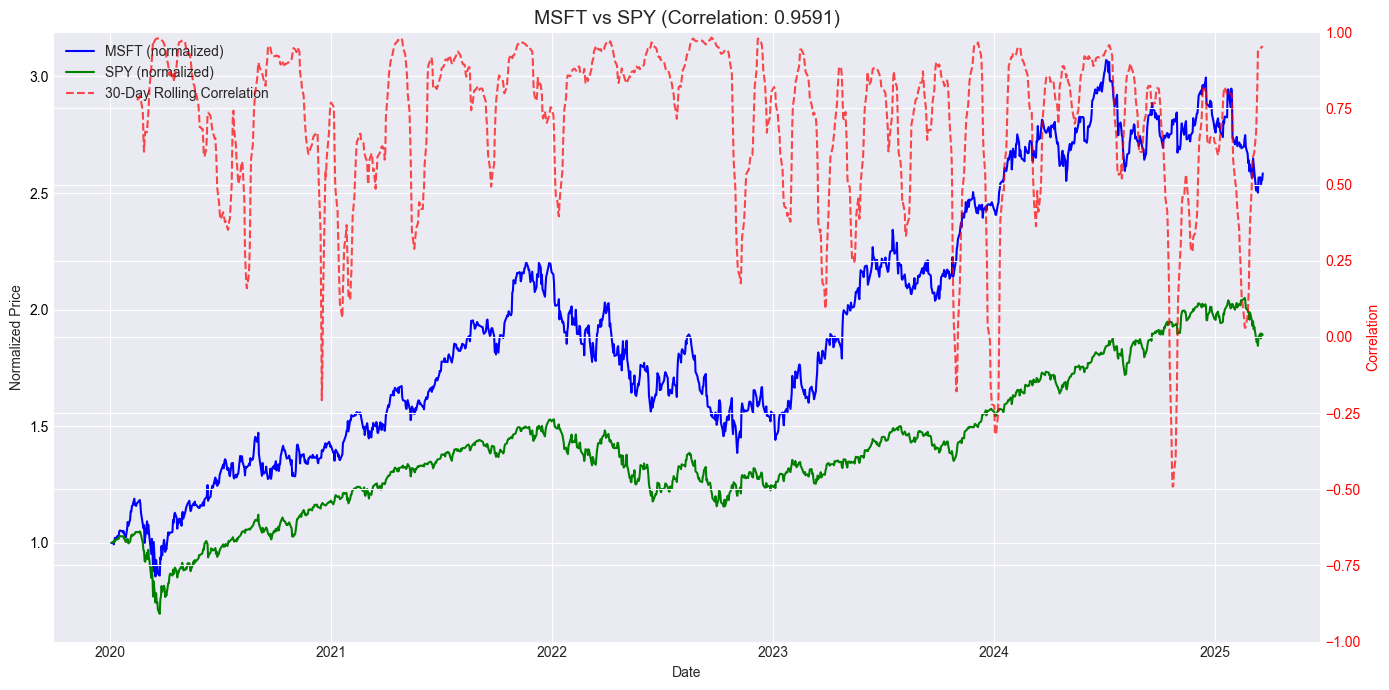

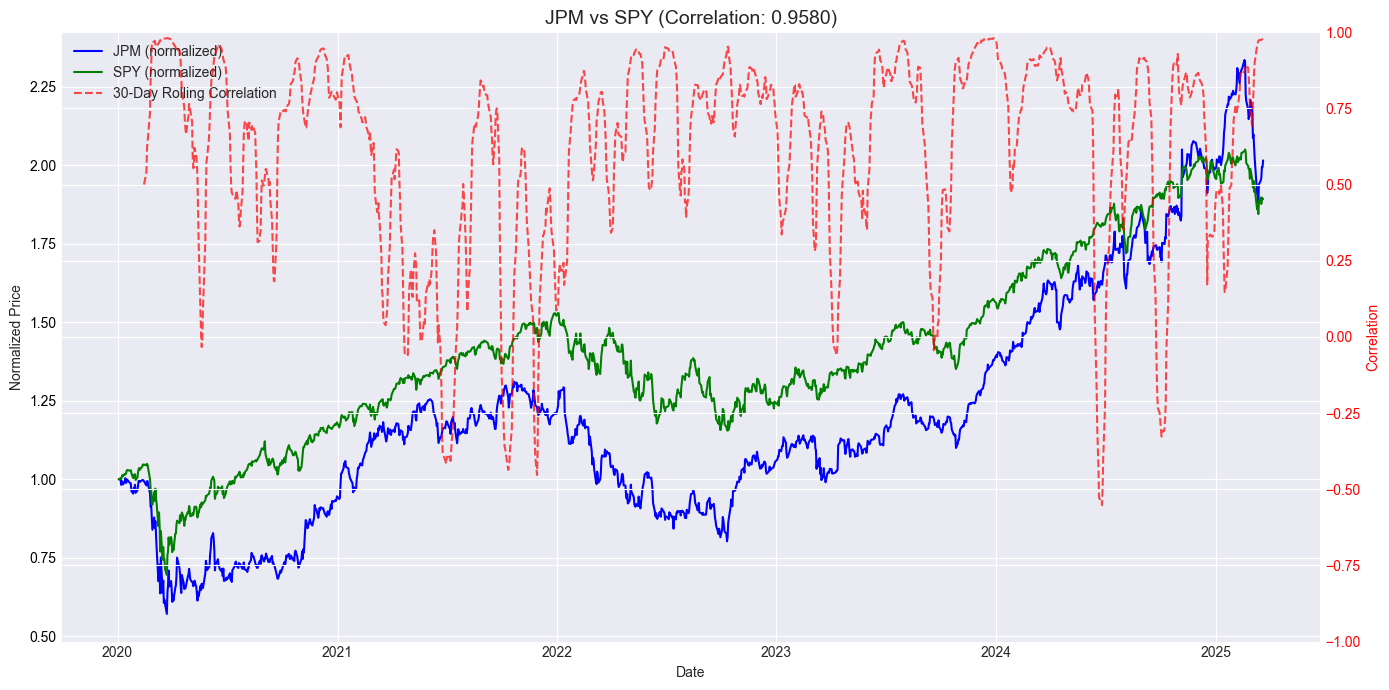

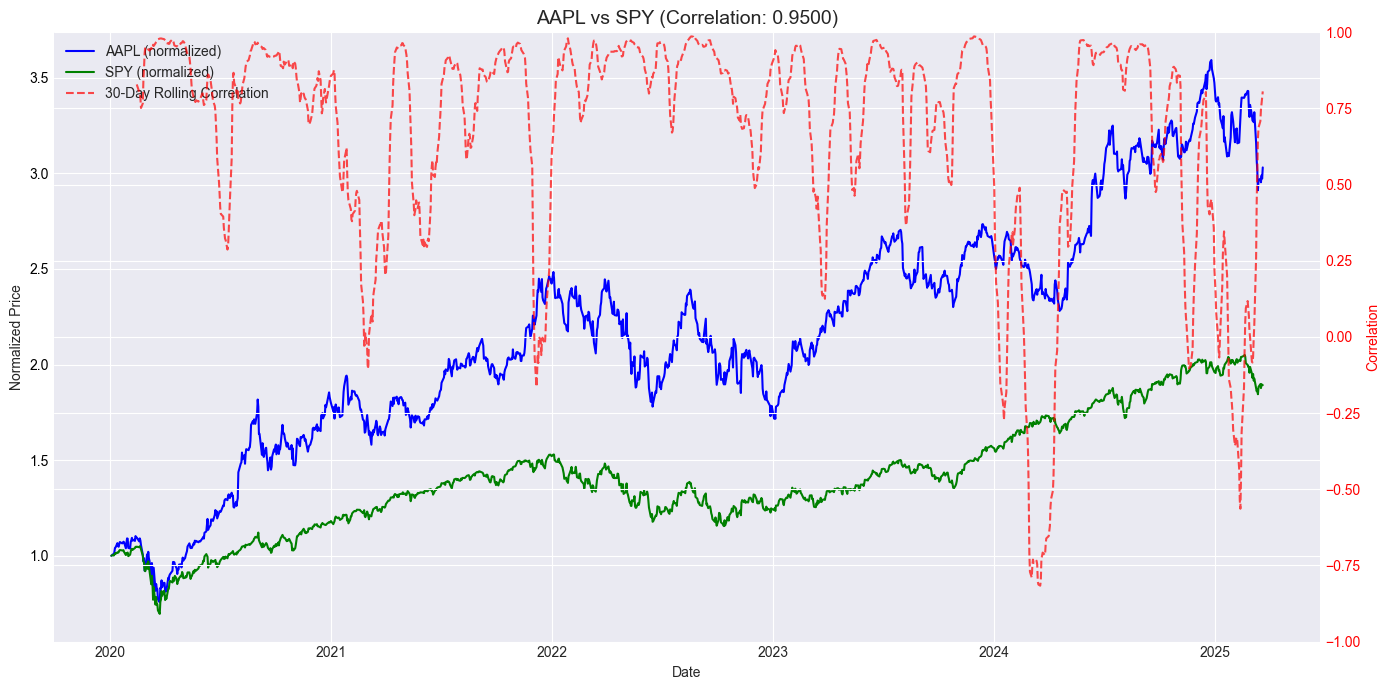

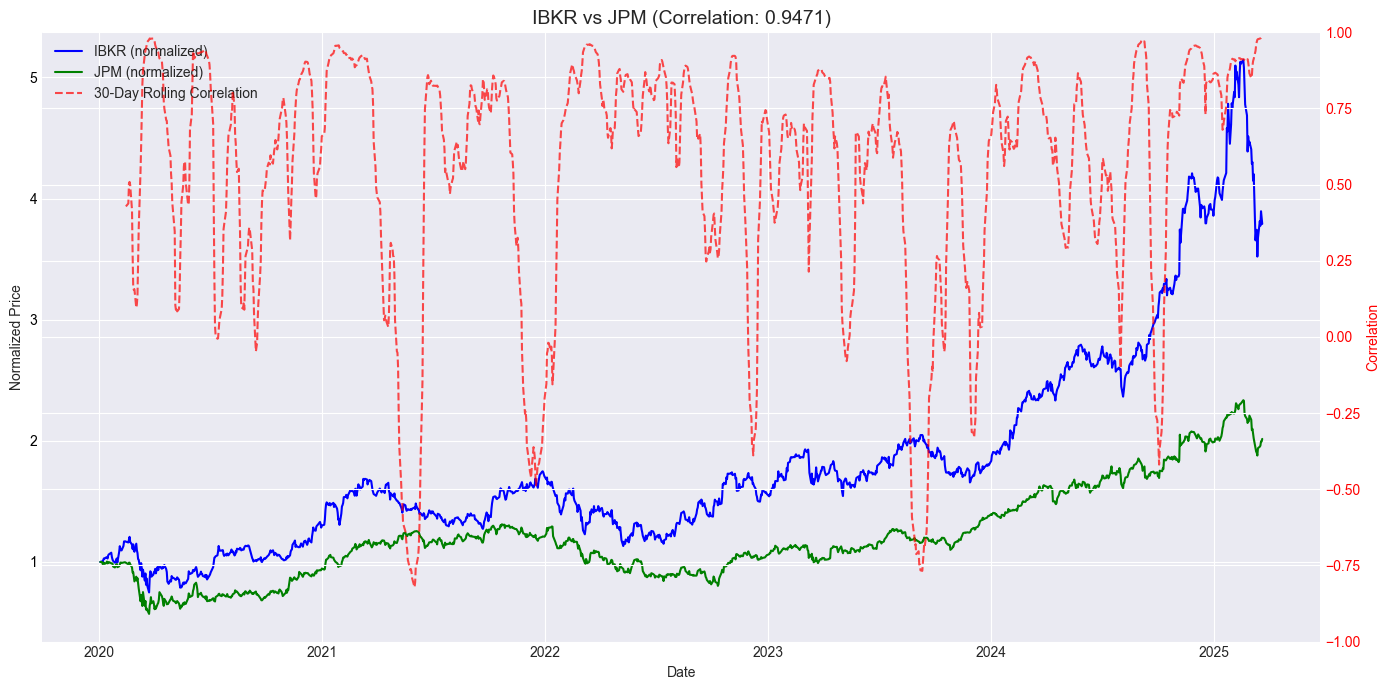

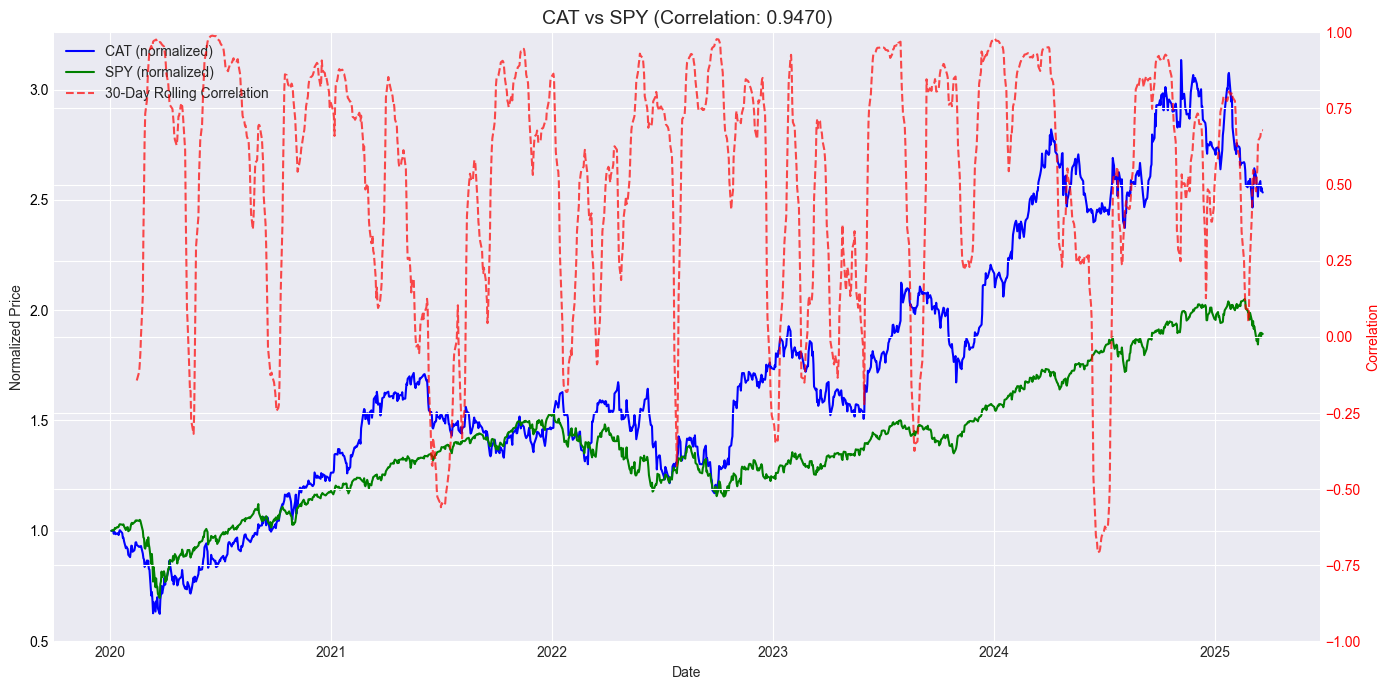

In [21]:
# 7. Visualize price movement for top pairs
if correlated_pairs:
    top_n = min(5, len(correlated_pairs))
    
    for i in range(top_n):
        ticker1, ticker2, corr = correlated_pairs[i]
        
        # Filter data for the two tickers
        pair_data = processed_df[processed_df['Ticker'].isin([ticker1, ticker2])]
        
        # Pivot to get time series
        pivot_df = pair_data.pivot(index='Date', columns='Ticker', values='Adjusted')
        
        # Get the price series
        price1 = pivot_df[ticker1]
        price2 = pivot_df[ticker2]
        
        # Calculate rolling correlation
        rolling_corr = price1.rolling(window=30).corr(price2)
        
        # Create figure with secondary y-axis
        fig, ax1 = plt.subplots(figsize=(14, 7))
        ax2 = ax1.twinx()
        
        # Plot normalized prices
        normalized_price1 = price1 / price1.iloc[0]
        normalized_price2 = price2 / price2.iloc[0]
        
        ax1.plot(normalized_price1.index, normalized_price1, label=f'{ticker1} (normalized)', color='blue')
        ax1.plot(normalized_price2.index, normalized_price2, label=f'{ticker2} (normalized)', color='green')
        ax1.set_xlabel('Date')
        ax1.set_ylabel('Normalized Price')
        ax1.tick_params(axis='y', labelcolor='black')
        
        # Plot rolling correlation
        ax2.plot(rolling_corr.index, rolling_corr, label='30-Day Rolling Correlation', 
                 color='red', alpha=0.7, linestyle='--')
        ax2.set_ylabel('Correlation', color='red')
        ax2.tick_params(axis='y', labelcolor='red')
        ax2.set_ylim(-1, 1)
        
        # Add title and legend
        plt.title(f'{ticker1} vs {ticker2} (Correlation: {corr:.4f})', fontsize=14)
        fig.tight_layout()
        
        # Combine legends
        lines1, labels1 = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
        
        plt.show()



In [22]:
# 8. Save the correlated pairs for cointegration testing
if correlated_pairs:
    # Save correlation matrix
    matrix_path = correlation_analyzer.save_correlation_matrix(correlation_matrix,
                                                              filename="correlation_matrix.csv")
    logger.info(f"Correlation matrix saved to {matrix_path}")
    
    # Save correlated pairs
    pairs_path = correlation_analyzer.save_correlated_pairs(correlated_pairs,
                                                          filename="correlated_pairs.csv")
    logger.info(f"Correlated pairs saved to {pairs_path}")
    
    print(f"Identified {len(correlated_pairs)} highly correlated pairs.")
    print(f"Saved data to {os.path.dirname(pairs_path)} for further analysis.")
else:
    print("No highly correlated pairs found to save.")



[ 2025-05-11 19:53:06,988 ] 250 src.analysis.correlation_analysis - INFO - Saving correlation matrix to ..\data\processed\correlation_matrix.csv
[ 2025-05-11 19:53:06,994 ] 255 src.analysis.correlation_analysis - INFO - Correlation matrix successfully saved to ..\data\processed\correlation_matrix.csv
[ 2025-05-11 19:53:06,995 ] 6 pairs_selection_notebook - INFO - Correlation matrix saved to ..\data\processed\correlation_matrix.csv
[ 2025-05-11 19:53:06,995 ] 279 src.analysis.correlation_analysis - INFO - Saving correlated pairs to ..\data\processed\correlated_pairs.csv
[ 2025-05-11 19:53:06,999 ] 287 src.analysis.correlation_analysis - INFO - Correlated pairs successfully saved to ..\data\processed\correlated_pairs.csv
[ 2025-05-11 19:53:07,000 ] 11 pairs_selection_notebook - INFO - Correlated pairs saved to ..\data\processed\correlated_pairs.csv


Identified 111 highly correlated pairs.
Saved data to ..\data\processed for further analysis.
